<a href="https://colab.research.google.com/github/emmaschmelzer/skills-introduction-to-github/blob/main/stat3041_final_exam_codes_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

a) LOAD DATA

In [ ]:
batter23 = pd.read_csv("Batter2023.csv")
batter24 = pd.read_csv("Batter2024.csv")

In [ ]:
batter23

,name,id,year,ab,hit,xba
0,"Witt Jr., Bobby",677951,2023,641,177,0.294
1,"Bregman, Alex",608324,2023,622,163,0.266
2,"Hoerner, Nico",663538,2023,619,175,0.273
3,"Rooker Jr., Brent",667670,2023,463,114,0.237
4,"Acuña Jr., Ronald",660670,2023,643,217,0.357
...,...,...,...,...,...,...
129,"Tucker, Kyle",663656,2023,574,163,0.292
130,"Stott, Bryson",681082,2023,585,164,0.267
131,"Albies, Ozzie",645277,2023,596,167,0.266
132,"Torres, Gleyber",650402,2023,596,163,0.282


In [ ]:
batter24

,name,id,year,ab,hit,xba
0,"Guerrero Jr., Vladimir",665489,2024,616,199,0.321
1,"Ramírez, José",608070,2024,620,173,0.259
2,"Semien, Marcus",543760,2024,650,154,0.251
3,"Gelof, Zack",680869,2024,497,105,0.199
4,"Varsho, Daulton",662139,2024,459,98,0.186
...,...,...,...,...,...,...
124,"Volpe, Anthony",683011,2024,637,155,0.238
125,"Arenado, Nolan",571448,2024,578,157,0.255
126,"Lindor, Francisco",596019,2024,618,169,0.283
127,"Giménez, Andrés",665926,2024,583,147,0.262


b) # Step b: Create a function for computing MLE

In [ ]:

def estimators(so1, ipout1, xba, method, year):
 # observed value
    obs = xba
# Compute p_i (MLE)
    if method == "MLE":
      est = so1 / ipout1

    # scatter plot
    plt.scatter(obs, est)
    plt.title('Maximum Likelihood Estimation of BA: '+str(year))
    plt.xlabel('Observed')
    plt.ylabel('Estimated')
    plt.axline((0.2,0.2), slope=1, color='k', ls='--')
    plt.show()

  # prediction error
    error = est-obs
    return est, error

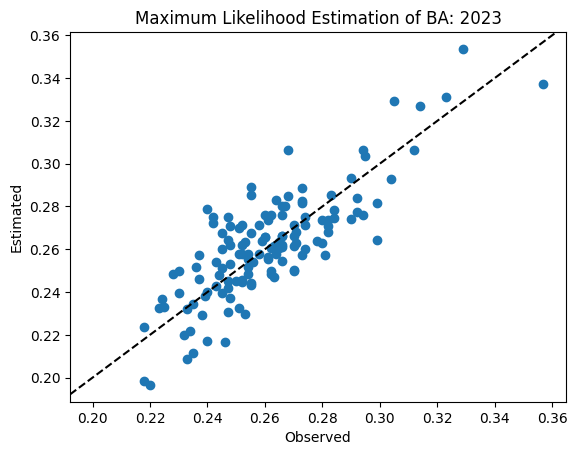

In [ ]:
est_mle, error_mle = estimators(batter23['hit'],batter23['ab'], batter23['xba'], "MLE", 2023)

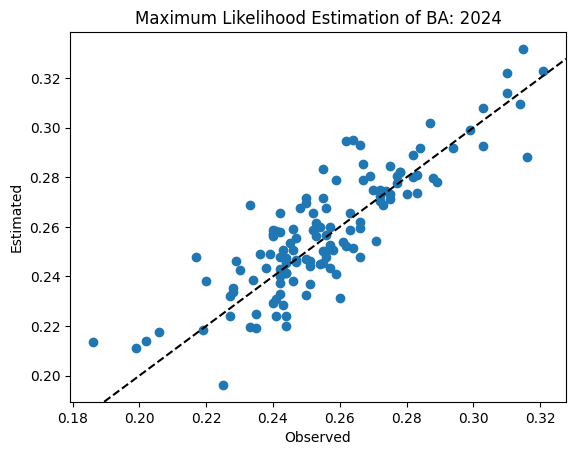

In [ ]:
est_mle, error_mle = estimators(batter24['hit'],batter24['ab'], batter24['xba'], "MLE", 2024)

STEP E: Players that played in 2023 and 2024 and rename variables

In [ ]:
#combine batter23 and batter24 into one dataset
batters_comb = pd.merge(batter23, batter24, on='name')
batters_comb

,name,id_x,year_x,ab_x,hit_x,xba_x,id_y,year_y,ab_y,hit_y,xba_y
0,"Witt Jr., Bobby",677951,2023,641,177,0.294,677951,2024,636,211,0.315
1,"Bregman, Alex",608324,2023,622,163,0.266,608324,2024,581,151,0.257
2,"Hoerner, Nico",663538,2023,619,175,0.273,663538,2024,582,159,0.280
3,"Rooker Jr., Brent",667670,2023,463,114,0.237,667670,2024,546,160,0.266
4,"Semien, Marcus",543760,2023,670,185,0.262,543760,2024,650,154,0.251
...,...,...,...,...,...,...,...,...,...,...,...
79,"Springer III, George",543807,2023,613,158,0.264,543807,2024,545,120,0.244
80,"Rutschman, Adley",668939,2023,588,163,0.292,668939,2024,571,143,0.255
81,"Stott, Bryson",681082,2023,585,164,0.267,681082,2024,506,124,0.254
82,"Torres, Gleyber",650402,2023,596,163,0.282,650402,2024,587,151,0.240


In [ ]:
#remove id variable
batters_comb = batters_comb.drop(['id_x', 'id_y', 'xba_x', 'xba_y', 'year_x', 'year_y'], axis=1)
batters_comb

,name,ab_x,hit_x,ab_y,hit_y
0,"Witt Jr., Bobby",641,177,636,211
1,"Bregman, Alex",622,163,581,151
2,"Hoerner, Nico",619,175,582,159
3,"Rooker Jr., Brent",463,114,546,160
4,"Semien, Marcus",670,185,650,154
...,...,...,...,...,...
79,"Springer III, George",613,158,545,120
80,"Rutschman, Adley",588,163,571,143
81,"Stott, Bryson",585,164,506,124
82,"Torres, Gleyber",596,163,587,151


In [ ]:
#rename columns ab_x, ab_y, hit_x, hit_y
batters_comb = batters_comb.rename(columns={'ab_x': 'ab23', 'ab_y': 'ab24', 'hit_x' : 'h23', 'hit_y' : 'h24'})
batters_comb

,name,ab23,h23,ab24,h24
0,"Witt Jr., Bobby",641,177,636,211
1,"Bregman, Alex",622,163,581,151
2,"Hoerner, Nico",619,175,582,159
3,"Rooker Jr., Brent",463,114,546,160
4,"Semien, Marcus",670,185,650,154
...,...,...,...,...,...
79,"Springer III, George",613,158,545,120
80,"Rutschman, Adley",588,163,571,143
81,"Stott, Bryson",585,164,506,124
82,"Torres, Gleyber",596,163,587,151


STEP F

In [ ]:
# Define function to return estimators and RMSEs and create scatterplot

def estimates(h1, ab1, h2, ab2, method):
    ba = h2/ab2
    n = len(h1)

    if method=='mle':
      est = h1/ab1
    elif method=='be':
      est = (np.sqrt(ab1/4)+h1) / (np.sqrt(ab1)+ab1)

    rmse = np.sqrt(np.sum((est-ba)**2)/n)

    error = est-ba

    plt.scatter(ba, est)
    plt.title('Batting Average: '+str(method))
    plt.xlabel('Observed')
    plt.ylabel('Estimated')
    plt.axline((0.2,0.2), slope=1, color='k', ls='--')
    plt.show()

    print('RMSE: ', rmse)
    return est, rmse, error

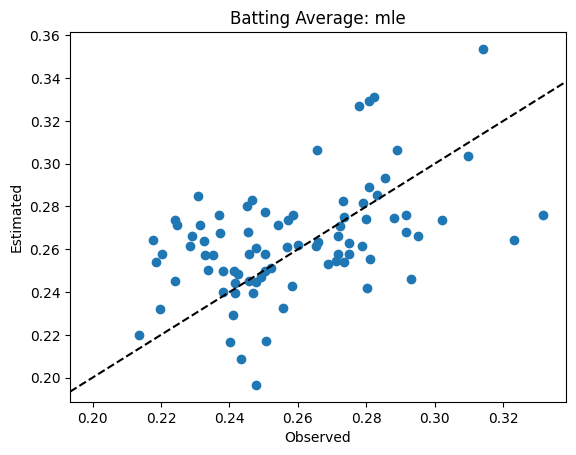

RMSE:  0.02676153452735085


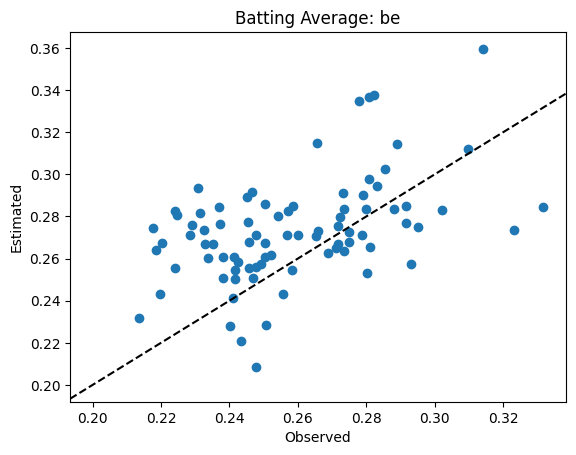

RMSE:  0.029625785537551554


In [ ]:
# Step c: Apply the function to calculate results for MLE and bE
est2_mle, mae_mle, error_mle = estimates(batters_comb['h23'], batters_comb['ab23'], batters_comb['h24'], batters_comb['ab24'], method = "mle")
batter_be, batters_rmse_be, batters_error_be= estimates(batters_comb['h23'], batters_comb['ab23'], batters_comb['h24'], batters_comb['ab24'], method = "be")

Text(0, 0.5, 'Prediction Error')

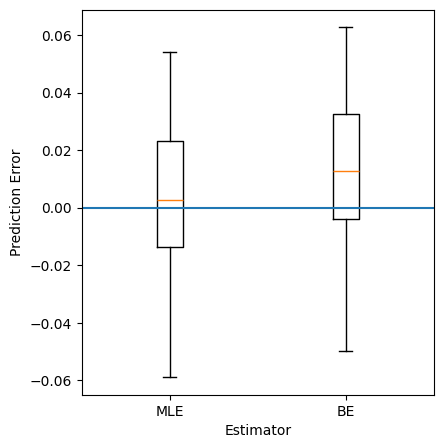

In [ ]:
# Create prediction error boxplot
plt.figure(figsize=(10,5))
#plt.figure()
ax1 = plt.subplot(1, 2, 1)
ax1.boxplot(bat_error)
ax1.axline((0.5,0), slope=0)
ax1.set_xticks([1,2]) # Set tick locations
ax1.set_xticklabels(['MLE', 'BE']) # Set tick labels

ax1.set_xlabel('Estimator')
ax1.set_ylabel('Prediction Error')